In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from netCDF4 import Dataset
import os
import tqdm
import datetime


In [2]:
server_dir = '/home/robbie/uit_mnt'
satam_directory = f'{server_dir}/Data/romal7177/ResearchData/IFT/EarthObservation/SatelliteAltimetry/'
st=r'$^{\rm st}$'

In [3]:
mission='cs2' #MUST BE CS2 IF CRYOSAT
# mission='ak'
hem='nh'

csvs_dir = f'{server_dir}/home/romal7177/nrcs/csvs'
all_csvs = os.listdir(csvs_dir)
all_csvs = [x for x in all_csvs if mission in x]
all_csvs = [x for x in all_csvs if hem in x]

list_of_dfs=[]
for i in tqdm.tqdm(all_csvs):
    df = pd.read_csv(f'{csvs_dir}/{i}',parse_dates=['date'])
    list_of_dfs.append(df)
cs2_nh = pd.concat(list_of_dfs)

hem='sh'
csvs_dir = f'{server_dir}/home/romal7177/nrcs/csvs'
all_csvs = os.listdir(csvs_dir)
all_csvs = [x for x in all_csvs if mission in x]
all_csvs = [x for x in all_csvs if hem in x]

list_of_dfs=[]
for i in tqdm.tqdm(all_csvs):
    df = pd.read_csv(f'{csvs_dir}/{i}',parse_dates=['date'])
    list_of_dfs.append(df)
cs2_sh = pd.concat(list_of_dfs)

100%|█████████████████████████████████████████| 134/134 [00:12<00:00, 10.79it/s]
/tmp/ipykernel_11942/601882384.py:26: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cs2_sh = pd.concat(list_of_dfs)


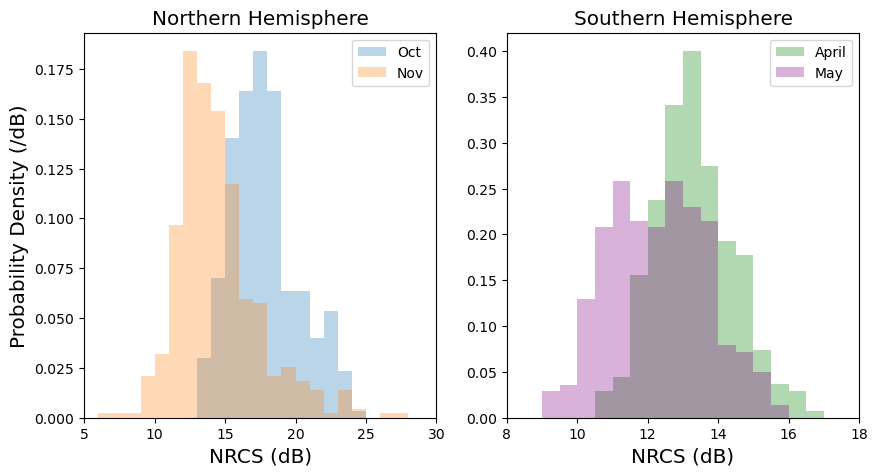

In [4]:
cs2_nh['month']=[x.month for x in cs2_nh['date']]
nhbins=np.arange(0,50,1)

cs2_sh['month']=[x.month for x in cs2_sh['date']]
shbins=np.arange(0,50,0.5)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5))

october = cs2_nh[cs2_nh['month']==10]
ax1.hist(10*np.log10(october['means_fyi']),alpha=0.3,label='Oct',bins=nhbins,density=True)

november = cs2_nh[cs2_nh['month']==11]
ax1.hist(10*np.log10(november['means_fyi']),alpha=0.3,label='Nov',bins=nhbins,density=True)

ax1.set_xlim(5,30)

ax1.legend()

april = cs2_sh[cs2_sh['month']==4]
ax2.hist(10*np.log10(april['means_fyi']),alpha=0.3,label='April',bins=shbins,density=True,color='green')

may = cs2_sh[cs2_sh['month']==5]
ax2.hist(10*np.log10(may['means_fyi']),alpha=0.3,label='May',bins=shbins,density=True,color='purple')

ax2.set_xlim(8,18)

ax2.legend()

ax1.set_ylabel('Probability Density (/dB)',fontsize='x-large')

ax1.set_title('Northern Hemisphere',fontsize='x-large')
ax2.set_title('Southern Hemisphere',fontsize='x-large')

for ax in [ax1,ax2]:
    ax.set_xlabel('NRCS (dB)',fontsize='x-large')

overleaf_dir = '/home/robbie/Dropbox/Apps/Overleaf/NRCS/figures/'

plt.savefig(f'{overleaf_dir}histograms.png',dpi=400,bbox_inches='tight')

In [5]:
np.nanmean(october['means_fyi']),np.nanmean(november['means_fyi']),(np.nanmean(october['means_fyi'])-np.nanmean(november['means_fyi']))/np.nanmean(october['means_fyi'])

(71.05822836156102, 38.56857040106274, 0.45722583731166555)

In [7]:
np.nanmean(april['means_fyi']),np.nanmean(may['means_fyi']),(np.nanmean(april['means_fyi'])-np.nanmean(may['means_fyi']))/np.nanmean(april['means_fyi'])

(22.26855571291674, 17.912626591328845, 0.19560896439553396)

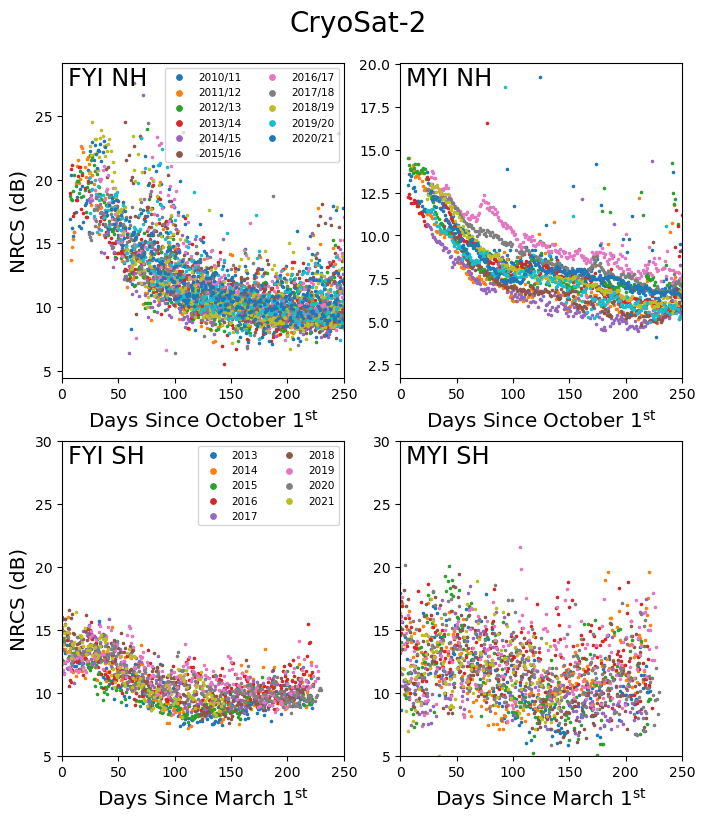

In [12]:
fig, axs = plt.subplots(2,2,figsize=(8,9))

ax1,ax2,ax3,ax4 = axs.reshape(-1)


s=10

##########


df = cs2_nh

df['doy']=[x.day_of_year for x in df['date']]
df['dsa']=[x-250 if x>250 else 365+x-250 for x in df['doy']]
df['year']=[x.year for x in df['date']]
df['month']=[x.month for x in df['date']]

for year in np.arange(2011,2022):
    
    
    
    dy0 = df[df['year']==year-1]
    dy0 = dy0[dy0['month']>9]
    
    dy1 = df[df['year']==year]
    dy1 = dy1[dy1['month']<10]
    
    d = pd.concat([dy0,dy1])
    
    label=str(year-1)+'/'+str(year)[-2:]
    
    sc = ax1.scatter(d['dsa'],10*np.log10(d['means_fyi']),marker='.',s=s)
    ax1.scatter([],[],marker='.',s=s+50,label=label,color=sc.get_facecolor())
                   
    ax2.scatter(d['dsa'],10*np.log10(d['means_myi']),marker='.',s=s)
    
for ax in [ax1,ax2]:
    # ax.set_ylim(5,30)
    ax.set_xticks(np.arange(0,351,50))
    ax.set_xticklabels(np.arange(0,351,50),rotation=0)
    ax.set_xlabel('Days Since October 1'+st,fontsize='x-large')
    ax.set_xlim(0,250)
        
ax1.set_xticks(np.arange(0,251,50))

ax1.set_ylabel('NRCS (dB)',fontsize='x-large')


########


df = cs2_sh

df['doy']=[x.day_of_year for x in df['date']]
df['dsa']=[x-250 if x>250 else 365+x-250 for x in df['doy']]
df['year']=[x.year for x in df['date']]
df['month']=[x.month for x in df['date']]

for year in np.arange(2013,2022):
    
    d = df[df['year']==year]
    
    sc=ax3.scatter(d['doy']-90,10*np.log10(d['means_fyi']),marker='.',s=s)
    ax3.scatter([],[],marker='.',s=s+50,label=year,color=sc.get_facecolor())
                   
    ax4.scatter(d['doy']-90,10*np.log10(d['means_myi']),marker='.',s=s)
    
for ax in [ax3,ax4]:
    ax.set_ylim(5,30)
    ax.set_xticks(np.arange(0,351,50))
    ax.set_xticklabels(np.arange(0,351,50),rotation=0)
    ax.set_xlabel('Days Since March 1'+st,fontsize='x-large')
    ax.set_xlim(0,250)
        
ax3.set_xticks(np.arange(0,251,50))

ax3.set_ylabel('NRCS (dB)',fontsize='x-large')

ax1.annotate('FYI NH',xycoords='axes fraction',xy=(0.02,0.93),fontsize='xx-large')
ax3.annotate('FYI SH',xycoords='axes fraction',xy=(0.02,0.93),fontsize='xx-large')
ax2.annotate('MYI NH',xycoords='axes fraction',xy=(0.02,0.93),fontsize='xx-large')
ax4.annotate('MYI SH',xycoords='axes fraction',xy=(0.02,0.93),fontsize='xx-large')

fs = 7.5
ax1.legend(ncol=2,fontsize=fs)
ax3.legend(ncol=2,fontsize=fs)

ax1.annotate('CryoSat-2',xycoords='axes fraction',xy=(1.05,1.1),fontsize=20,ha='center')

overleaf_dir = '/home/robbie/Dropbox/Apps/Overleaf/NRCS/figures/'

plt.savefig(f'{overleaf_dir}CS2_NRCSb.png',dpi=400,bbox_inches='tight')

100%|█████████████████████████████████████████| 118/118 [00:11<00:00, 10.72it/s]
/tmp/ipykernel_6130/671520771.py:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cs2_sh = pd.concat(list_of_dfs)


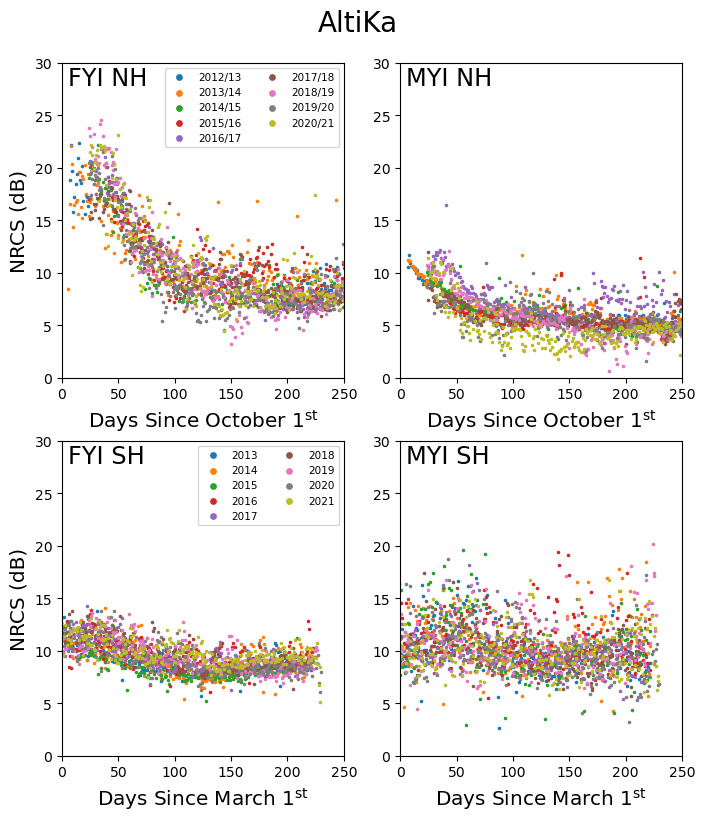

In [13]:
mission='ak'
hem='nh'

csvs_dir = f'{server_dir}/home/romal7177/nrcs/csvs'
all_csvs = os.listdir(csvs_dir)
all_csvs = [x for x in all_csvs if mission in x]
all_csvs = [x for x in all_csvs if hem in x]

list_of_dfs=[]
for i in tqdm.tqdm(all_csvs):
    df = pd.read_csv(f'{csvs_dir}/{i}',parse_dates=['date'])
    list_of_dfs.append(df)
cs2_nh = pd.concat(list_of_dfs)

hem='sh'
csvs_dir = f'{server_dir}/home/romal7177/nrcs/csvs'
all_csvs = os.listdir(csvs_dir)
all_csvs = [x for x in all_csvs if mission in x]
all_csvs = [x for x in all_csvs if hem in x]

list_of_dfs=[]
for i in tqdm.tqdm(all_csvs):
    df = pd.read_csv(f'{csvs_dir}/{i}',parse_dates=['date'])
    list_of_dfs.append(df)
cs2_sh = pd.concat(list_of_dfs)


fig, axs = plt.subplots(2,2,figsize=(8,9))

ax1,ax2,ax3,ax4 = axs.reshape(-1)


s=10

##########


df = cs2_nh

df['doy']=[x.day_of_year for x in df['date']]
df['dsa']=[x-250 if x>250 else 365+x-250 for x in df['doy']]
df['year']=[x.year for x in df['date']]
df['month']=[x.month for x in df['date']]

for year in np.arange(2013,2022):
    
    
    
    dy0 = df[df['year']==year-1]
    dy0 = dy0[dy0['month']>9]
    
    dy1 = df[df['year']==year]
    dy1 = dy1[dy1['month']<10]
    
    d = pd.concat([dy0,dy1])
    
    label=str(year-1)+'/'+str(year)[-2:]
    
    sc = ax1.scatter(d['dsa'],10*np.log10(d['means_fyi']),marker='.',s=s)
    ax1.scatter([],[],marker='.',s=s+50,label=label,color=sc.get_facecolor())
                   
    ax2.scatter(d['dsa'],10*np.log10(d['means_myi']),marker='.',s=s)
    
for ax in [ax1,ax2]:
    ax.set_ylim(0,30)
    ax.set_xticks(np.arange(0,351,50))
    ax.set_xticklabels(np.arange(0,351,50),rotation=0)
    ax.set_xlabel('Days Since October 1'+st,fontsize='x-large')
    ax.set_xlim(0,250)
        
ax1.set_xticks(np.arange(0,251,50))

ax1.set_ylabel('NRCS (dB)',fontsize='x-large')


########


df = cs2_sh

df['doy']=[x.day_of_year for x in df['date']]
df['dsa']=[x-250 if x>250 else 365+x-250 for x in df['doy']]
df['year']=[x.year for x in df['date']]
df['month']=[x.month for x in df['date']]

for year in np.arange(2013,2022):
    
    d = df[df['year']==year]
    
    sc=ax3.scatter(d['doy']-90,10*np.log10(d['means_fyi']),marker='.',s=s)
    ax3.scatter([],[],marker='.',s=s+50,label=year,color=sc.get_facecolor())
                   
    ax4.scatter(d['doy']-90,10*np.log10(d['means_myi']),marker='.',s=s)
    
for ax in [ax3,ax4]:
    ax.set_ylim(0,30)
    ax.set_xticks(np.arange(0,351,50))
    ax.set_xticklabels(np.arange(0,351,50),rotation=0)
    ax.set_xlabel('Days Since March 1'+st,fontsize='x-large')
    ax.set_xlim(0,250)
        
ax3.set_xticks(np.arange(0,251,50))

ax3.set_ylabel('NRCS (dB)',fontsize='x-large')

ax1.annotate('FYI NH',xycoords='axes fraction',xy=(0.02,0.93),fontsize='xx-large')
ax3.annotate('FYI SH',xycoords='axes fraction',xy=(0.02,0.93),fontsize='xx-large')
ax2.annotate('MYI NH',xycoords='axes fraction',xy=(0.02,0.93),fontsize='xx-large')
ax4.annotate('MYI SH',xycoords='axes fraction',xy=(0.02,0.93),fontsize='xx-large')

ax1.annotate('AltiKa',xycoords='axes fraction',xy=(1.05,1.1),fontsize=20,ha='center')

fs = 7.5
ax1.legend(ncol=2,fontsize=fs)
ax3.legend(ncol=2,fontsize=fs)


overleaf_dir = '/home/robbie/Dropbox/Apps/Overleaf/NRCS/figures/'

plt.savefig(f'{overleaf_dir}ak_NRCSb.png',dpi=400,bbox_inches='tight')

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [00:01<00:00, 75.43it/s]


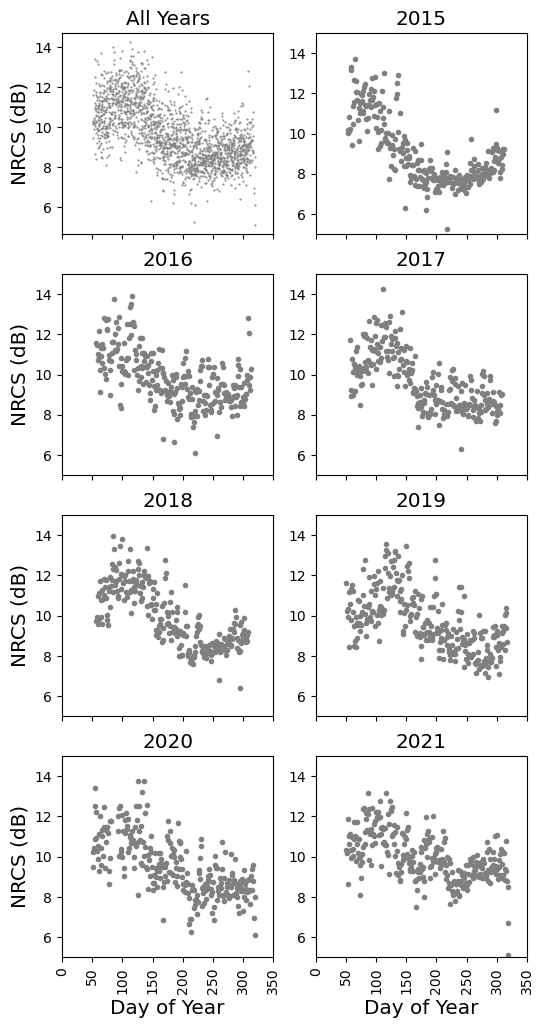

In [9]:
mission='cs2' #MUST BE CS2 IF CRYOSAT
mission='ak'
hem='sh'

csvs_dir = f'{server_dir}/home/romal7177/nrcs/csvs'
all_csvs = os.listdir(csvs_dir)
all_csvs = [x for x in all_csvs if mission in x]
all_csvs = [x for x in all_csvs if hem in x]

list_of_dfs=[]
for i in tqdm.tqdm(all_csvs):
    df = pd.read_csv(f'{csvs_dir}/{i}',parse_dates=['date'])
    list_of_dfs.append(df)

df = pd.concat(list_of_dfs)
df['doy']=[x.day_of_year for x in df['date']]

df['year']=[x.year for x in df['date']]
df['month']=[x.month for x in df['date']]

fig, axs = plt.subplots(4,2,figsize=(6,12))

ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8=axs.reshape(-1)

for year,ax in zip(np.arange(2015,2022),axs.reshape(-1)[1:]):
    
    d = df[df['year']==year]
                   
    ax1.scatter(d['doy'],10*np.log10(d['means_fyi']),marker='.',color='grey',s=1)
                   
    ax.scatter(d['doy'],10*np.log10(d['means_fyi']),marker='.',color='grey')
    ax.set_ylim(5,15)
    ax.set_title(year,fontsize='x-large')
    ax.set_xticks(np.arange(0,351,50))
    ax.set_xticklabels(np.arange(0,351,50),rotation=90)
ax1.set_xticks(np.arange(0,351,50))

ax1.set_title('All Years',fontsize='x-large')

for ax in axs.reshape(-1)[:6]:
    ax.set_xticklabels([])
    
for ax in [ax7,ax8]:
    ax.set_xlabel('Day of Year',fontsize='x-large')
    
for ax in [ax1,ax3,ax5,ax7]:
    ax.set_ylabel('NRCS (dB)',fontsize='x-large')

100%|████████████████████████████████████████| 134/134 [00:00<00:00, 983.62it/s]
/tmp/ipykernel_6130/795396267.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat(list_of_dfs)


[0.2651848182033976, 0.3205412312129079, 0.23338182442233749, 0.21321088837193236, 0.3867489192387882, 0.3356826654235872, 0.35647286149902735, 0.3751020831097599, 0.4359129020087931]


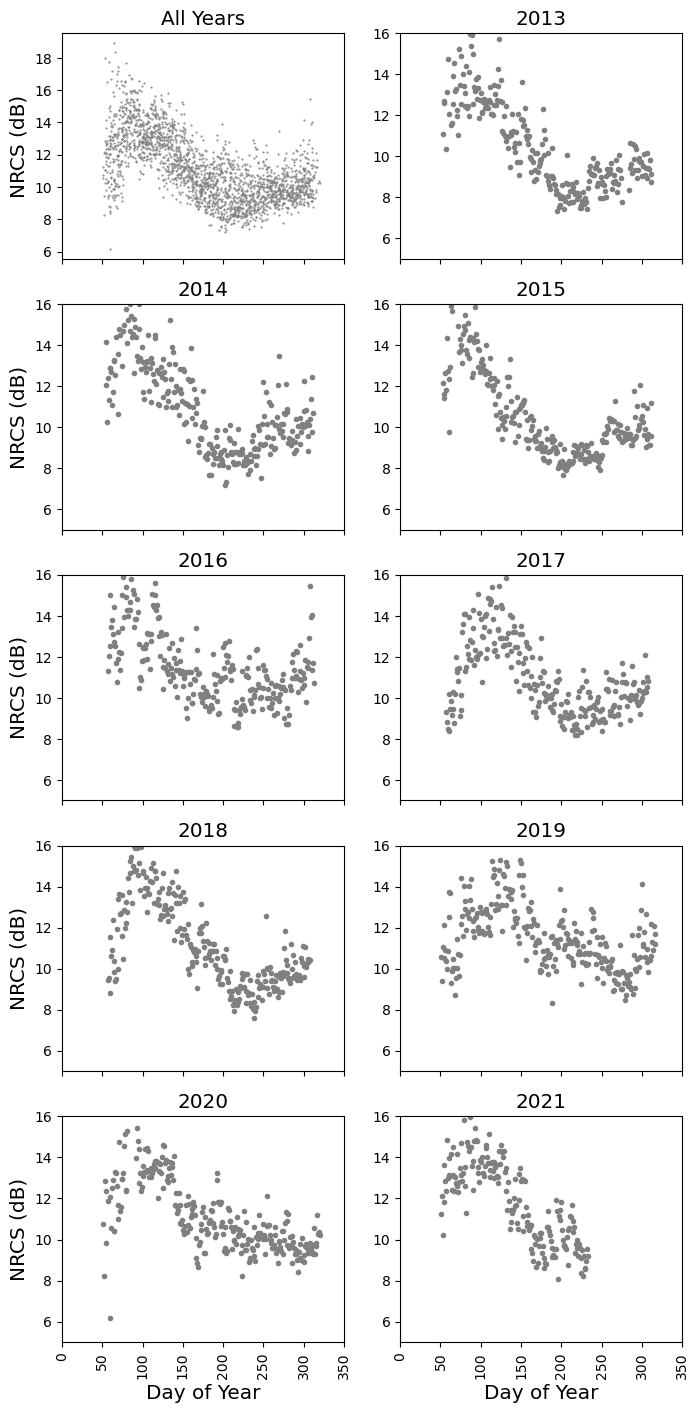

In [21]:
mission='cs2' #MUST BE CS2 IF CRYOSAT
hem='sh'

csvs_dir = f'../../data/satellite/csvs/'
all_csvs = os.listdir(csvs_dir)
all_csvs = [x for x in all_csvs if mission in x]
all_csvs = [x for x in all_csvs if hem in x]

list_of_dfs=[]
for i in tqdm.tqdm(all_csvs):
    df = pd.read_csv(f'{csvs_dir}/{i}',parse_dates=['date'])
    list_of_dfs.append(df)

df = pd.concat(list_of_dfs)
df['doy']=[x.day_of_year for x in df['date']]

df['year']=[x.year for x in df['date']]
df['month']=[x.month for x in df['date']]

fig, axs = plt.subplots(5,2,figsize=(8,17))

ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10=axs.reshape(-1)

drops = []
for year,ax in zip(np.arange(2013,2022),axs.reshape(-1)[1:]):
    
    d = df[df['year']==year]

    march = np.nanmean(d[d['month']==3]['means_fyi'])
    april = np.nanmean(d[d['month']==5]['means_fyi'])
    may = np.nanmean(d[d['month']==6]['means_fyi'])

    # drops.append((march-april)/march)
    drops.append((april-may)/april)
                   
    ax1.scatter(d['doy'],10*np.log10(d['means_fyi']),marker='.',color='grey',s=1)
                   
    ax.scatter(d['doy'],10*np.log10(d['means_fyi']),marker='.',color='grey')
    ax.set_ylim(5,16)
    ax.set_title(year,fontsize='x-large')
    ax.set_xticks(np.arange(0,351,50))
    ax.set_xticklabels(np.arange(0,351,50),rotation=90)
ax1.set_xticks(np.arange(0,351,50))

ax1.set_title('All Years',fontsize='x-large')

for ax in axs.reshape(-1)[:8]:
    ax.set_xticklabels([])
    
for ax in [ax9,ax10]:
    ax.set_xlabel('Day of Year',fontsize='x-large')
    
for ax in [ax1,ax3,ax5,ax7,ax9]:
    ax.set_ylabel('NRCS (dB)',fontsize='x-large')

print(drops)

In [23]:
d

,Unnamed: 0,means_fyi,stds_fyi,num_fyi,means_myi,stds_myi,num_myi,date,doy,year,month
0,0,24.131206,45.725374,15543,23.404899,36.787234,335,2021-04-01,91,2021,4
1,1,30.060150,52.378518,471,15.840183,5.100941,2,2021-04-02,92,2021,4
2,2,34.783811,80.421039,451,15.576771,17.671374,15,2021-04-03,93,2021,4
3,3,30.601995,56.339233,501,12.862512,5.775491,3,2021-04-04,94,2021,4
4,4,30.157699,59.798300,655,7.176556,3.891847,12,2021-04-05,95,2021,4
...,...,...,...,...,...,...,...,...,...,...,...
26,26,15.615527,24.596065,658,27.607272,30.354759,82,2021-05-27,147,2021,5
27,27,20.813951,44.654825,598,30.680344,55.022352,75,2021-05-28,148,2021,5
28,28,22.297528,48.686939,659,51.017609,74.843161,67,2021-05-29,149,2021,5
29,29,19.190821,44.447033,609,12.385074,11.583924,83,2021-05-30,150,2021,5


100%|████████████████████████████████████████| 268/268 [00:00<00:00, 975.75it/s]
/tmp/ipykernel_6130/3853106867.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(0,351,50),rotation=0)
/tmp/ipykernel_6130/3853106867.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(0,351,50),rotation=0)
/tmp/ipykernel_6130/3853106867.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(0,351,50),rotation=0)
/tmp/ipykernel_6130/3853106867.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(np.arange(0,351,50),rotation=0)
/tmp/ipykernel_6130/3853106867.py:40: UserW

[0.24076747204829957, 0.27914416934252806, 0.13621757752334301, 0.4599730302385003, -0.05505353510227974, 0.6876504215927965, 0.38541806711448967, 0.6133338012600216, nan]
0.34343137550221237


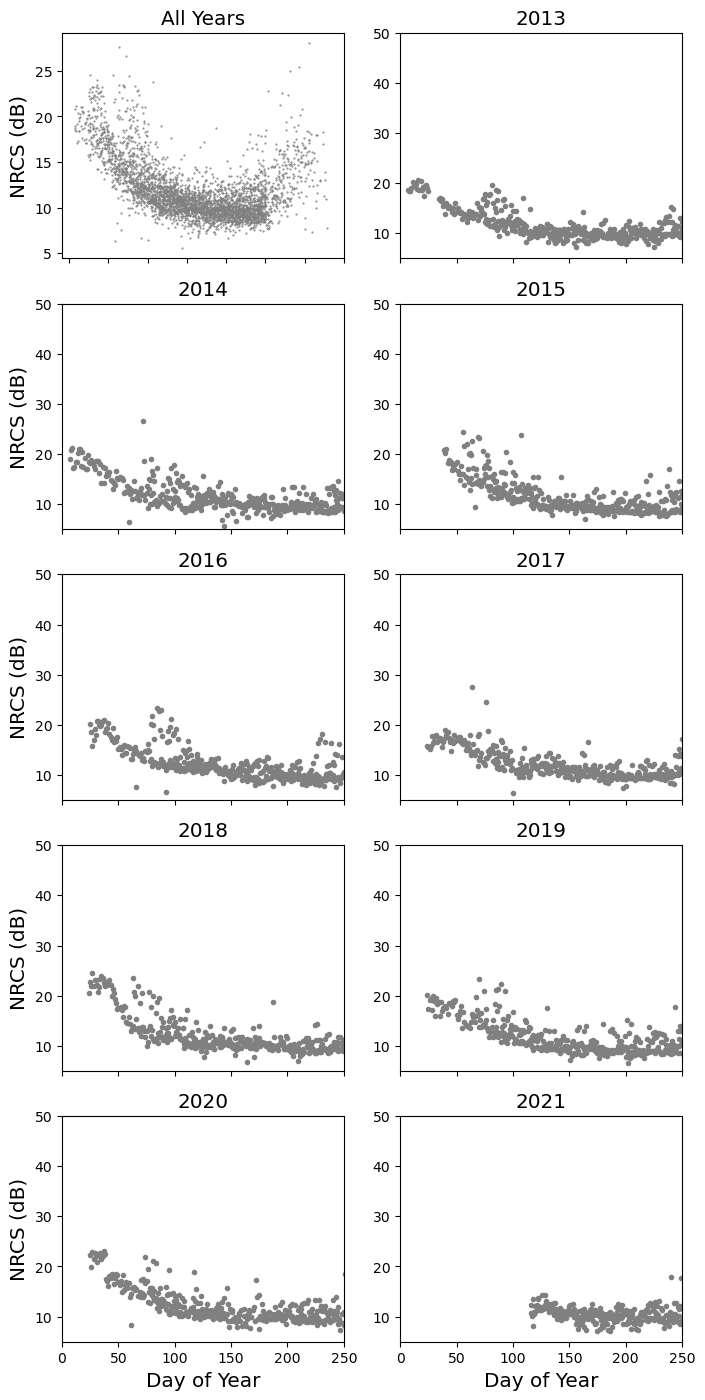

In [36]:
mission='cs2' #MUST BE CS2 IF CRYOSAT
hem='nh'

csvs_dir = f'../../data/satellite/csvs/'
all_csvs = os.listdir(csvs_dir)
all_csvs = [x for x in all_csvs if mission in x]
all_csvs = [x for x in all_csvs if hem in x]

list_of_dfs=[]
for i in tqdm.tqdm(all_csvs):
    df = pd.read_csv(f'{csvs_dir}/{i}',parse_dates=['date'])
    list_of_dfs.append(df)

df = pd.concat(list_of_dfs)
df['doy']=[x.day_of_year for x in df['date']]
df['dsa']=[x-250 if x>250 else 365+x-250 for x in df['doy']]
df['year']=[x.year for x in df['date']]
df['month']=[x.month for x in df['date']]

fig, axs = plt.subplots(5,2,figsize=(8,17))

ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10=axs.reshape(-1)

drops = []
for year,ax in zip(np.arange(2013,2022),axs.reshape(-1)[1:]):
    
    d = df[df['year']==year]

    october = np.nanmean(d[d['month']==10]['means_fyi'])
    november = np.nanmean(d[d['month']==11]['means_fyi'])

    drops.append((october-november)/october)
                   
    ax1.scatter(d['dsa'],10*np.log10(d['means_fyi']),marker='.',color='grey',s=1)
                   
    ax.scatter(d['dsa'],10*np.log10(d['means_fyi']),marker='.',color='grey')
    
    ax.set_ylim(5,50)
    ax.set_title(year,fontsize='x-large')
    ax.set_xticklabels(np.arange(0,351,50),rotation=0)
    # ax.set_xlabel('Days Since March 1'+st,fontsize='x-large')
    ax.set_xlim(0,250)
ax1.set_xticks(np.arange(0,351,50))

ax1.set_title('All Years',fontsize='x-large')

for ax in axs.reshape(-1)[:8]:
    ax.set_xticklabels([])
    
for ax in [ax9,ax10]:
    ax.set_xlabel('Day of Year',fontsize='x-large')
    
for ax in [ax1,ax3,ax5,ax7,ax9]:
    ax.set_ylabel('NRCS (dB)',fontsize='x-large')

print(drops)
print(np.nanmean(drops))

0.34343137550221237